In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


%matplotlib inline

## Data preparation

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-10-22 22:52:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   365KB/s    in 3.8s    

2023-10-22 22:52:13 (365 KB/s) - ‘housing.csv’ saved [1423529/1423529]



In [5]:
df = pd.read_csv(data)

In [6]:
#filter dataset to only contain ocean_proximity with value either '<1H OCEAN' or 'INLAND'
df = df[
    (df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')
]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
#reset index of dataset
df = df.reset_index(drop=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Fill missing values with zeros.
df = df.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
# Apply the log transform to median_house_value.
df['median_house_value'] = np.log1p(df.median_house_value.values)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883,INLAND


In [11]:
seed = 1

In [12]:
# Do train/validation/test split with 60%/20%/20% distribution.
#split test data 20% and full train dataset 80%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
#split full train dataset to train and validation dataset 
# validation is 20% of whole data, so in full_train_dataset prespective means 20%/80% = 25%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [13]:
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [16]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [39]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the median_house_value variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [42]:
#train decision tree
dt = DecisionTreeRegressor(max_depth=1)
dt = dt.fit(X_train, y_train)

[Text(0.5, 0.75, 'ocean_proximity=<1H OCEAN <= 0.5\nsquared_error = 0.322\nsamples = 9411\nvalue = 12.011'),
 Text(0.25, 0.25, 'squared_error = 0.23\nsamples = 3924\nvalue = 11.607'),
 Text(0.75, 0.25, 'squared_error = 0.186\nsamples = 5487\nvalue = 12.301')]

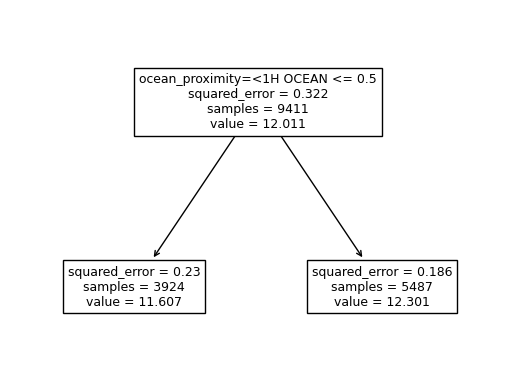

In [43]:
tree.plot_tree(dt,feature_names=dv.feature_names_)

from the tree visualization we can see used feature  for splitting the data is **ocean_proximity** 

## Question 2

Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [49]:
y_pred = rf.predict(X_val)
y_pred

array([12.19234146, 12.13600559, 11.58298397, ..., 11.72815537,
       11.25588243, 11.62903578])

In [52]:
round(rmse(y_val, y_pred),3)

0.245

the RMSE of this model on validation is **0.245**

## Question 3

Now let's experiment with the n_estimators parameter


- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

In [66]:
scores = []

for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    random_state=1,
                                  n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_score = rmse(y_val, y_pred)

        scores.append((n, round(rmse_score,3)))

In [67]:
columns = ['n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

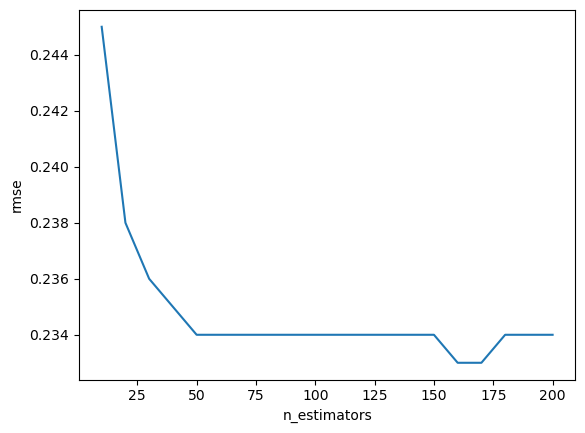

In [69]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.show()

From plotted graph we can see rmse stop decreasing (improving in performace term) at n_estimators = **50**

## Question 4

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values,
    * try different values of n_estimators from 10 till 200 (with step 10)
    * calculate the mean RMSE
* Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [70]:
scores = []

# add more paramater to tune, which is max_depth
# max_depth indicate number depth of the decision tree

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_score = rmse(y_val, y_pred)

        scores.append((d, n, rmse_score))

In [72]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

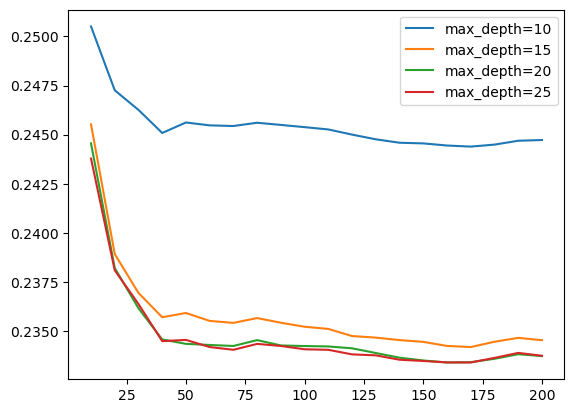

In [74]:
# plot based on max_depth group data
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [78]:
rmse_by_max_depth = df_scores.groupby('max_depth')['rmse'].mean()
rmse_by_max_depth

max_depth
10    0.245453
15    0.235789
20    0.234834
25    0.234742
Name: rmse, dtype: float64

In [80]:
rmse_by_max_depth.sort_values(ascending=True)

max_depth
25    0.234742
20    0.234834
15    0.235789
10    0.245453
Name: rmse, dtype: float64

The best rmse is when "max_depth" is **25**